In [2]:
import sys
sys.path.append('..')

from deep import *

In [26]:
df = pd.read_csv('../Data/detectability_homo.csv')
df2 = pd.read_csv('../Data/detectability_mus.csv')
df['peptide_len'] = df['peptide'].apply(len)
df2['peptide_len'] = df2['peptide'].apply(len)
x2, y2 = df2[['peptide', 'detectability']].values.T

df_train = df.iloc[:67000]
df_val = df.iloc[67000:70000]
df_test = df.iloc[70000:]
x_train, y_train = df_train[['peptide', 'detectability']].values.T
x_val, y_val = df_val[['peptide', 'detectability']].values.T
x_test, y_test = df_test[['peptide', 'detectability']].values.T
df.head()

In [22]:
df[['peptide', 'peptide_len', 'detectability']].head()

,peptide,peptide_len,detectability
0,LLSEVEELNMSLTALREK,18,0
1,ERMDEEQKLYTD,12,0
2,YVPRAVLVDLEPGTMDSIR,19,0
3,TAHYGSLPQKSHGR,14,1
4,KFVADGIFK,9,1


## Distributions in the data

Human max peptide len: 79
Mouse max peptide len: 66


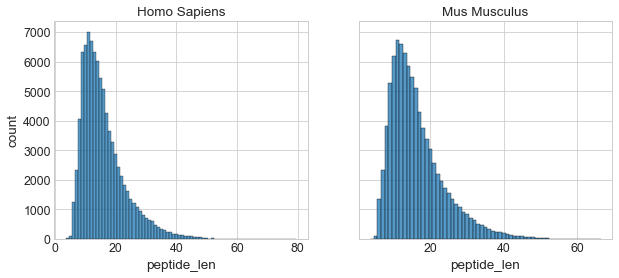

In [27]:
print(f"Human max peptide len: {df['peptide_len'].max()}")
print(f"Mouse max peptide len: {df2['peptide_len'].max()}")

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.histplot(data=df, x='peptide_len', discrete=True, ax=ax1)
sns.histplot(data=df2, x='peptide_len', discrete=True, ax=ax2)
ax1.set_title('Homo Sapiens')
ax2.set_title('Mus Musculus')
ax1.set_ylabel('count')
plt.savefig('Plots/detectability_dist.jpg', dpi=300, bbx_inches='tight')

## Optimization

In [37]:
model = 'gru'
df_optim = pd.read_csv(f'Results/Optim/{model.lower()}.csv')
df_optim.sort_values(by='loss')

,loss,batch_size,dropout,lr,num_layers,output_dim,weight_decay
6,0.448202,132,0.449854,0.000484,3,140,0.000029
24,0.457008,256,0.147057,0.000247,3,96,0.000441
17,0.459551,24,0.251883,0.002381,2,128,0.000333
0,0.460178,168,0.333673,0.001587,1,148,0.039167
1,0.460203,20,0.391744,0.000792,1,40,0.009203
13,0.461516,128,0.347351,0.010112,1,36,0.065736
2,0.461908,28,0.318337,0.000122,3,168,0.364163
11,0.463046,172,0.041594,0.016161,2,32,0.000081
22,0.467082,80,0.118796,0.000045,3,120,0.001277
21,0.469431,84,0.214823,0.000306,4,232,0.000976


## Training

(0.4292915518283844, 0.506023237546285)

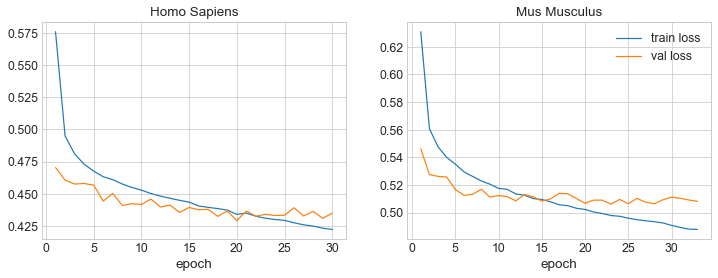

In [38]:
df_training = pd.read_csv('Results/GRUHomo/training.csv')
df_training = df_training.rename(columns={'train_loss': 'train loss', 'test_loss': 'val loss'})
df_training = df_training.set_index('epoch')

df_training2 = pd.read_csv('Results/GRUMus/training.csv')
df_training2 = df_training2.rename(columns={'train_loss': 'train loss', 'test_loss': 'val loss'})
df_training2 = df_training2.set_index('epoch')


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
df_training.plot(ax=ax1)
ax1.set_title('Homo Sapiens')
ax1.get_legend().remove()
df_training2[['train loss', 'val loss']].plot(ax=ax2)
ax2.set_title('Mus Musculus')
# plt.savefig('Plots/detectability_gru_training.png', dpi=300, bbox_inches='tight')

df_training['val loss'].min(), df_training2['val loss'].min()

,train loss,train_acc,val loss,test_acc
epoch,,,,
48,0.433203,0.800381,0.446547,0.794167


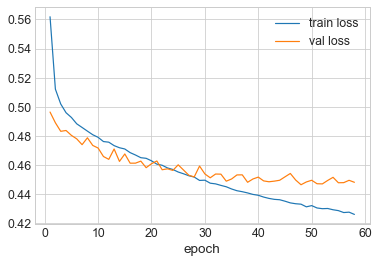

In [39]:
df_training = pd.read_csv('Results/GRUBoth/training.csv')
df_training = df_training.rename(columns={'train_loss': 'train loss', 'test_loss': 'val loss'})
df_training = df_training.set_index('epoch')
df_training[['train loss', 'val loss']].plot()
# plt.savefig('Plots/detectability_gru_both_training.png', dpi=300, bbox_inches='tight')

df_training[df_training['val loss']==df_training['val loss'].min()]

## Metrics

In [15]:
def acc(tn, fp, fn, tp):
    return (tp+tn) / (tp+tn+fp+fn)

def specificity(tn, fp, fn, tp):
    return tn / (tn+fp)

def sensitivity(tn, fp, fn, tp):
    return tp / (tp+fn)
    
def append_metrics(metrics):
    metrics_fn = {
        'SP': specificity,
        'SN': sensitivity,
    }    
    for k, v in metrics_fn.items():
        metrics['Train '+k] = v(*metrics['Train Confusion'])
        metrics['Test '+k] = v(*metrics['Test Confusion'])
    return metrics

def get_metrics(tn, fp, fn, tp):
    metrics = {}
    metrics['ACC'] = acc(tn, fp, fn, tp)
    metrics['SP'] = specificity(tn, fp, fn, tp)
    metrics['SN'] = sensitivity(tn, fp, fn, tp)
    return metrics
# get_metrics(26358, 18642,  3810, 41190)

### GRU

In [40]:
# Mus Musculus - transfer
# {'ACC': 0.7431666666666666, 'SP': 0.5789111111111112, 'SN': 0.9074222222222222, 'AUC': 0.8084417479012347}
# Confusion: 26051, 18949,  4166, 40834

# Trained and tested on Homo Sapiens
gru_metrics = pickle.load(open('Results/GRUHomo/metrics.pkl', 'rb'))
gru_metrics = append_metrics(gru_metrics)
gru_metrics

{'Train BCE': 0.4166679165571469,
 'Test BCE': 0.43851049532457836,
 'Train ACC': 0.8148955223880597,
 'Test ACC': 0.80485,
 'Train AUC': 0.8791943511730778,
 'Test AUC': 0.8654233665170463,
 'Train Confusion': array([24111,  9401,  3001, 30487], dtype=int64),
 'Test Confusion': array([7076, 2903, 1000, 9021], dtype=int64),
 'Train SP': 0.7194736213893531,
 'Test SP': 0.709089087082874,
 'Train SN': 0.9103858098423315,
 'Test SN': 0.9002095599241593}

In [41]:
# Trained and tested on Mus Musculus
gru_metrics = pickle.load(open('Results/GRUMus/metrics.pkl', 'rb'))
gru_metrics = append_metrics(gru_metrics)
gru_metrics

{'Train BCE': 0.47999079787413546,
 'Test BCE': 0.5080620965022128,
 'Train ACC': 0.7702388059701493,
 'Test ACC': 0.7549,
 'Train AUC': 0.8366353502049129,
 'Test AUC': 0.8159099095585529,
 'Train Confusion': array([21723, 11786,  3608, 29883], dtype=int64),
 'Test Confusion': array([6374, 3666, 1236, 8724], dtype=int64),
 'Train SP': 0.6482735981378137,
 'Test SP': 0.6348605577689242,
 'Train SN': 0.8922695649577499,
 'Test SN': 0.8759036144578313}

In [45]:
# Trained on both datasets and tested on Homo Sapiens
gru_metrics = pickle.load(open('Results/GRUBoth/metrics_homo.pkl', 'rb'))
gru_metrics = append_metrics(gru_metrics)
gru_metrics

{'Train BCE': 0.4022297491623565,
 'Test BCE': 0.41950992494011297,
 'Train ACC': 0.8176641791044776,
 'Test ACC': 0.81665,
 'Train AUC': 0.8874421184811705,
 'Test AUC': 0.8741045848012189,
 'Train Confusion': array([46812, 20209,  4224, 62755], dtype=int64),
 'Test Confusion': array([7279, 2700,  967, 9054], dtype=int64),
 'Train SP': 0.6984676444696438,
 'Test SP': 0.729431806794268,
 'Train SN': 0.9369354573821645,
 'Test SN': 0.9035026444466621}

In [46]:
# Trained on both datasets and tested on Mus Musculus
gru_metrics = pickle.load(open('Results/GRUBoth/metrics_mus.pkl', 'rb'))
gru_metrics = append_metrics(gru_metrics)
gru_metrics

{'Train BCE': 0.40222974912403325,
 'Test BCE': 0.504980018245359,
 'Train ACC': 0.8176641791044776,
 'Test ACC': 0.75865,
 'Train AUC': 0.8874421190380875,
 'Test AUC': 0.8258264632234115,
 'Train Confusion': array([46812, 20209,  4224, 62755], dtype=int64),
 'Test Confusion': array([6108, 3932,  895, 9065], dtype=int64),
 'Train SP': 0.6984676444696438,
 'Test SP': 0.6083665338645419,
 'Train SN': 0.9369354573821645,
 'Test SN': 0.910140562248996}

### Ensemble

In [47]:
# Mus Musculus - transfer
# [26358, 18642,  3810, 41190] AUC: 0.8178094750617284

# Trained and tested on Homo Sapiens
ensemble_metrics = pickle.load(open('Results/EnsembleHomo/metrics.pkl', 'rb'))
ensemble_metrics = append_metrics(ensemble_metrics)
ensemble_metrics

{'Train BCE': 0.3607424130314462,
 'Test BCE': 0.42352987803415165,
 'Train ACC': 0.8430428571428571,
 'Test ACC': 0.81365,
 'Train AUC': 0.9097076715763943,
 'Test AUC': 0.8737156030858096,
 'Train Confusion': array([26185,  8836,  2151, 32828], dtype=int64),
 'Test Confusion': array([7183, 2796,  931, 9090], dtype=int64),
 'Train SP': 0.7476942405984981,
 'Test SP': 0.7198116043691752,
 'Train SN': 0.9385059607192887,
 'Test SN': 0.9070951002893923}

In [48]:
# Trained and tested on Mus Musculus
ensemble_metrics = pickle.load(open('Results/EnsembleMus/metrics.pkl', 'rb'))
ensemble_metrics = append_metrics(ensemble_metrics)
ensemble_metrics

{'Train BCE': 0.4346853758935018,
 'Test BCE': 0.5003550632346654,
 'Train ACC': 0.7962142857142858,
 'Test ACC': 0.75695,
 'Train AUC': 0.8703136363280148,
 'Test AUC': 0.8242567931086897,
 'Train Confusion': array([23112, 11848,  2417, 32623], dtype=int64),
 'Test Confusion': array([6269, 3771, 1090, 8870], dtype=int64),
 'Train SP': 0.6610983981693364,
 'Test SP': 0.624402390438247,
 'Train SN': 0.9310216894977169,
 'Test SN': 0.8905622489959839}

In [49]:
# Trained on both and tested on Homo Sapiens
ensemble_metrics = pickle.load(open('Results/EnsembleBoth/metrics_homo.pkl', 'rb'))
ensemble_metrics = append_metrics(ensemble_metrics)
ensemble_metrics

{'Train BCE': 0.35627041404467935,
 'Test BCE': 0.39986244894211703,
 'Train ACC': 0.8419928571428571,
 'Test ACC': 0.8245,
 'Train AUC': 0.9168122901978034,
 'Test AUC': 0.8863075736163997,
 'Train Confusion': array([51125, 18856,  3265, 66754], dtype=int64),
 'Test Confusion': array([7412, 2567,  943, 9078], dtype=int64),
 'Train SP': 0.7305554364756148,
 'Test SP': 0.7427597955706985,
 'Train SN': 0.9533697996258158,
 'Test SN': 0.9058976150084822}

In [50]:
# Trained on both and tested on Mus Musculus
ensemble_metrics = pickle.load(open('Results/EnsembleBoth/metrics_mus.pkl', 'rb'))
ensemble_metrics = append_metrics(ensemble_metrics)
ensemble_metrics

{'Train BCE': 0.3562704136773312,
 'Test BCE': 0.4815836915348948,
 'Train ACC': 0.8419928571428571,
 'Test ACC': 0.772,
 'Train AUC': 0.9168122906059667,
 'Test AUC': 0.8405173382774125,
 'Train Confusion': array([51125, 18856,  3265, 66754], dtype=int64),
 'Test Confusion': array([6318, 3722,  838, 9122], dtype=int64),
 'Train SP': 0.7305554364756148,
 'Test SP': 0.6292828685258964,
 'Train SN': 0.9533697996258158,
 'Test SN': 0.915863453815261}

## Sample Efficiency

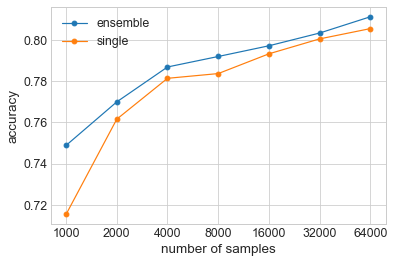

In [51]:
from matplotlib.ticker import ScalarFormatter

r_avg = pickle.load(open('Results/SampleEfficiency/gru_avg.pkl', 'rb'))
r_ensemble = pickle.load(open('Results/SampleEfficiency/ensemble.pkl', 'rb'))

f, ax = plt.subplots()
ax.plot(r_ensemble['n_samples'], r_ensemble['Test ACC'], marker='o', label='ensemble')
ax.plot(r_avg['n_samples'], r_avg['Test ACC'], marker='o', label='single')
plt.legend()
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('accuracy')
plt.xticks(r_avg['n_samples'])
ax.xaxis.set_major_formatter(ScalarFormatter())
# plt.savefig('Plots/detectability_sample_efficiency.jpg', dpi=300, bbox_inches='tight')

## AUC Plot


In [15]:
params = {
    'batch_size': 132,
    'dropout': 0.449853682405601,
    'lr': 0.00048433947922833076,
    'num_layers': 3,
    'output_dim': 140,
    'weight_decay': 2.9229430030464116e-05
}

path = 'https://raw.githubusercontent.com/WLYLab/PepFormer/main/dataset/'
df = pd.read_csv(path+'Homo_sapiens.csv', header=None).iloc[70000:]
df.columns = ['peptide', 'detectability']
x, y = df[['peptide', 'detectability']].values.T

df2 = pd.read_csv(path+'Mus_musculus.csv', header=None).iloc[70000:]
df2.columns = ['peptide', 'detectability']
x2, y2 = df[['peptide', 'detectability']].values.T

In [16]:
def get_gru(path,
            output_dim, num_layers, dropout,
            batch_size, lr, weight_decay):

    net = nn.Sequential(
        RecurrentEncoder(
            input_dim=len(aminoacids)+2,
            embedding_dim=output_dim//2,
            output_dim=output_dim,
            bidirectional=True,
            rnn_type='gru',
            pool_type='avg',
            num_layers=num_layers, 
            dropout=dropout,
        ),
        nn.Dropout(dropout),
        nn.Linear(output_dim, 1),
        nn.Sigmoid()
    ).to(device)
        
    gru = Network(
        net=net,
        optimizer=torch.optim.AdamW(net.parameters(), lr=lr,
                                    weight_decay=weight_decay),
        loss=nn.BCELoss(),
        gamma=0.97,
        path='model.pth'
    )
    gru.load(path+'model.pth', device)
    return gru

def get_ensemble(path,
                 output_dim, num_layers, dropout,
                 batch_size, lr, weight_decay):
    nets = []
    for rnn_type in ['gru', 'lstm']:
        for pool_type in ['avg', 'max', 'last']:
            nets.append(
                nn.Sequential(
                    RecurrentEncoder(
                        input_dim=len(aminoacids)+2,
                        embedding_dim=output_dim//2,
                        output_dim=output_dim,
                        bidirectional=True,
                        rnn_type=rnn_type,
                        pool_type=pool_type,
                        num_layers=num_layers, 
                        dropout=dropout,
                    ),
                    nn.Dropout(dropout),
                    nn.Linear(output_dim, 1),
                    nn.Sigmoid()
                ).to(device)
            )
    
    models = []
    for i, net in enumerate(nets):
        models.append(
            Network(
                net=net,
                optimizer=torch.optim.AdamW(net.parameters(), lr=lr,
                                            weight_decay=weight_decay),
                loss=nn.BCELoss(),
                gamma=0.97,
                path=f'model{i}.pth'
            )
        )
        
    ensemble = VotingEnsemble(models)
    for i, model in enumerate(ensemble.models):
        model.load(path+f'model{i}.pth', device)
    
    return ensemble

In [17]:
gru_homo = get_gru('Results/GRUHomo/', **params)
gru_mus = get_gru('Results/GRUMus/', **params)
gru_both = get_gru('Results/GRUBoth/', **params)

ensemble_homo = get_ensemble('Results/EnsembleHomo/', **params)
ensemble_mus = get_ensemble('Results/EnsembleMus/', **params)
ensemble_both = get_ensemble('Results/EnsembleBoth/', **params)

loader_homo = DataLoader(
    dataset=PeptideDataset(x, y, aminoacids),
    shuffle=False,
    batch_size=1024,
    collate_fn=Collate()
)

loader_mus = DataLoader(
    dataset=PeptideDataset(x2, y2, aminoacids),
    shuffle=False,
    batch_size=1024,
    collate_fn=Collate()
)

In [18]:
def get_roc(model, loader):
    preds, targets = model.predict_from_loader(loader, to_numpy=True)
    fpr, tpr, _ = roc_curve(targets, preds)
    return fpr, tpr

rates_homo = {}
rates_homo['gru'] = get_roc(gru_homo, loader_homo)
rates_homo['gru_both'] = get_roc(gru_both, loader_homo)
rates_homo['ensemble'] = get_roc(ensemble_homo, loader_homo)
rates_homo['ensemble_both'] = get_roc(ensemble_both, loader_homo)

rates_mus = {}
rates_mus['gru'] = get_roc(gru_mus, loader_mus)
rates_mus['gru_both'] = get_roc(gru_both, loader_mus)
rates_mus['ensemble'] = get_roc(ensemble_mus, loader_mus)
rates_mus['ensemble_both'] = get_roc(ensemble_both, loader_mus)

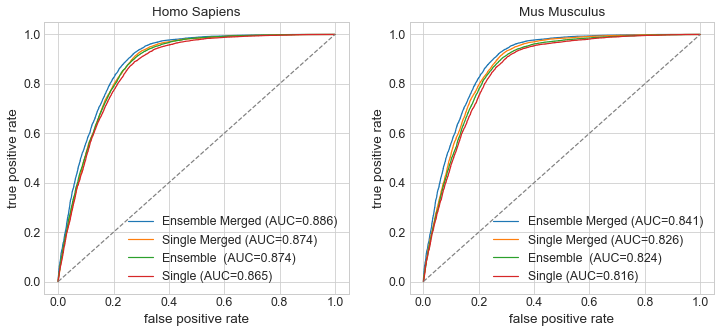

In [19]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))

rates = (rates_homo, rates_mus)
titles = ('Homo Sapiens', 'Mus Musculus')
aucs = [
    [0.886, 0.874, 0.874, 0.865],
    [0.841, 0.826, 0.824, 0.816],
]
for ax, rates, title, auc in zip(axes, rates, titles, aucs):
    ax.step(*rates['ensemble_both'], label=f'Ensemble Merged (AUC={auc[0]})')
    ax.step(*rates['gru_both'], label=f'Single Merged (AUC={auc[1]})')
    ax.step(*rates['ensemble'], label=f'Ensemble  (AUC={auc[2]})')
    ax.step(*rates['gru'], label=f'Single (AUC={auc[3]})')
    ax.plot([0, 1], [0, 1], '--', color='gray')
    ax.set_title(title)
    ax.set_xlabel('false positive rate')
    ax.set_ylabel('true positive rate')
    ax.legend()
plt.savefig('Plots/detectability_roc.jpg', dpi=300, bbox_inches='tight')